## Import packages

In [241]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

Load the model.

In [242]:
best_model = YOLO('train_yolov8n/weights/best.pt')

Load an Image.

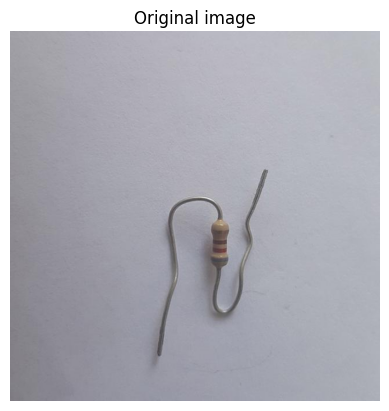

In [243]:
#img_name = 'resistor value training.v8i.yolov8/test/images/5B-47K-T1-8_jpg.rf.acb76613e5e67be3ab61ed5c7abff03b.jpg'
img_name = 'resistor value training.v8i.yolov8/test/images/820R_1-4W_-89-_jpg.rf.e77e0ae0d4e055e2f42090570d8e946a.jpg'
#img_name = 'resistor value training.v8i.yolov8/test/images/7K5_1-4W_-2-_jpg.rf.b17112858a858c1832a0e9b5e8dedad4.jpg'

img = cv2.imread(img_name)

# Plot with MatPlotLib
img_origin_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')  # Hide axes
plt.title('Original image')
plt.imshow(img_origin_RGB)

Inference an image.

In [244]:
results = best_model(img_name)
names = results[0].names

# Get result data
boxes = results[0].boxes.xyxy.cpu().numpy()   # Bounding boxes
class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
confidences = results[0].boxes.conf.cpu().numpy()

classNames = [names[id] for id in class_ids]
for name, conf in zip(classNames, confidences):
    print(f"{name:<6} | Confidence: {conf:.2f}")


image 1/1 d:\git\ITMO\ML\ML_3\resistor value training.v8i.yolov8\test\images\820R_1-4W_-89-_jpg.rf.e77e0ae0d4e055e2f42090570d8e946a.jpg: 640x640 1 brown, 2 golds, 2 greys, 1 red, 175.9ms
Speed: 3.2ms preprocess, 175.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
brown  | Confidence: 0.77
red    | Confidence: 0.70
grey   | Confidence: 0.69
gold   | Confidence: 0.47
gold   | Confidence: 0.31
grey   | Confidence: 0.29


Delete repeated classes.

In [245]:
if len(class_ids) > 5:
    boxes = boxes[:5]
    class_ids = class_ids[:5]
    confidences = confidences[:5]
    classNames = classNames[:5]
for name, conf in zip(classNames, confidences):
    print(f"{name:<6} | Confidence: {conf:.2f}")

brown  | Confidence: 0.77
red    | Confidence: 0.70
grey   | Confidence: 0.69
gold   | Confidence: 0.47
gold   | Confidence: 0.31


Visualize with custom color palette.

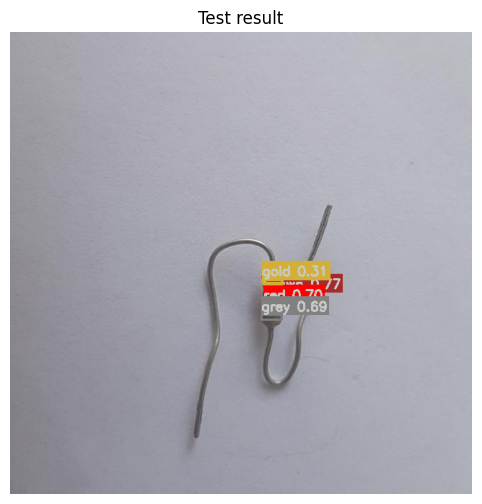

'\n# Plot with cv2\ncv2.imshow("Custom Colors", img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [246]:
custom_palette = {
    0:  [0, 0, 0],        # black
    1:  [255, 0, 0],      # blue
    2:  [42, 42, 165],    # brown
    3:  [55, 175, 212],   # gold
    4:  [0, 255, 0],      # green
    5:  [128, 128, 128],  # grey
    6:  [0, 165, 255],    # orange
    7:  [0, 0, 255],      # red
    8:  [192, 192, 192],  # silver
    9:  [230, 0, 255],    # violet
    10: [255, 255, 255],  # white
    11: [0, 255, 255]     # yellow
}

# Draw predictions manually
for i in range(len(boxes)):
    x1, y1, x2, y2 = map(int, boxes[i])
    cls_id = class_ids[i]
    conf = confidences[i]
    label = f"{names[cls_id]} {conf:.2f}"

    # Get color from custom color map
    color = custom_palette.get(cls_id, (255, 255, 255))  # Default white if class not found

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    # Draw label background + text
    font_scale = 0.6
    thickness = 2
    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)

    # Background rectangle for label
    cv2.rectangle(img, (x1, y1 - 25), (x1 + text_width, y1), color, -1)

    # White text on top
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                font_scale, (200, 200, 200), thickness)

# Plot with MatPlotLib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.title('Test result')
plt.show()

'''
# Plot with cv2
cv2.imshow("Custom Colors", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
